# Simulating December Rainfall in Portland using Markov Chains and the Monte Carlo Method

SYS-535 <br>
Graham Taylor <br>
Spring 2020 <br>

## Introduction

This project will be simulating monthly total rainfall amounts in Portland, using Markov chains and the Monte Carlo method. 

Because almost all of Portland's weather is sourced from the Pacific ocean, it’s generally determined by large patterns that can last for days or longer. So, the likelihood of rainfall on one day is related to the occurrence of rainfall on the previous day. Building this likelihood out from observed data, my objective is to create a Markov chain for the month of December using a probability matrix that can accurately simulate average rainfall distributions in Portland. 

This will be completed in a number of steps:

1) Evaluate historical (1980-2017) rainfall data from the Portland airport, provided by the National Weather Service, retrieved from here: https://w2.weather.gov/climate/local_data.php?wfo=pqr <br>
Historical data is used to establish the following parameters in the simulation: Average Monthly December Precipitation Total, and Average December Rain Days. From these parameters, a daily rain day accumulation will be assigned in each run of the simulation, with a random adjustment each run. <br>
2) Simulate 30 days of rainfall using a random probability matrix, many times. This will produce a dataset of rainfall totals and corresponding probability matrices. <br>
3) Limit the result dataset to rainfall totals that fall within 1 standard deviation of historical rainfall totals, and calculate the mean probability matrix of that dataset. <br>
4) Rerun my simulation with the calculated probability matrix and compare the results with historical rainfall totals.



This is primarily an exercise for statistical fun, as opposed to solving a real problem, but this kind of analysis is used for weather forecasting (at a much, much more sophisticated level). 

## Historical Rainfall Data

### Data Summary

Data was limited to 1980-2017 to both maximize the data used and to align with standards around what constitutes "climate", which is generally agreed upon to be 30 years.

In [4]:
# read in historical data to get some parameters for my simulation
# import modules

import numpy as np
import random 
import time
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# rainfall data from the pdx airport since 1980
# retrieved from the NWS

# this data will be attached with my submission
pdxdata = pd.read_csv('pdxdailyraindata.csv')

# convert data from inches to mm

pdxdata['Rain'] = pdxdata['Rain'] * 25.4
pdxdata['MonthTotal'] = pdxdata['MonthTotal'] * 25.4
pdxdata[0:10]

,Year,Month,MonthTotal,Day,Rain,date
0,1980,12,246.888,1,1.778,12/1/80
1,1980,12,246.888,2,52.832,12/2/80
2,1980,12,246.888,3,42.926,12/3/80
3,1980,12,246.888,4,1.016,12/4/80
4,1980,12,246.888,5,0.254,12/5/80
5,1980,12,246.888,6,0.508,12/6/80
6,1980,12,246.888,7,0.000,12/7/80
7,1980,12,246.888,8,0.000,12/8/80
8,1980,12,246.888,9,0.000,12/9/80
9,1980,12,246.888,10,0.000,12/10/80


### Calculate parameters used for the simulation


In [2]:
# monthly mean precipitation
mean_monthly_precip = np.mean(pdxdata['MonthTotal'])
# monthly mean precipitation days per month
mean_rain_days = sum(1 for x in pdxdata['Rain'] if x>0) / len(pdxdata['Rain']) * 31


## Methods

### Markov Chain <br>
A markov chain is a model that describes a sequence of events, in which the liklihood of each event is determined by the previous event. To define the probability of event E_n transitioning to event E_n+1, a probability matrix is defined. In this project, two possible states are used: rainy or dry. A 2x2 probability matrix is defined, containing transition probabilities for (1) dry->dry, dry->rainy, and (2) rainy->dry, rainy->rainy, where (1) and (2) must both sum to 100%. Initially, these probabilities will be defined using random numbers. 


### Monte Carlo Simulation
As covered in this course, monte carlo methods use repeated random sampling to produce results. In this project, the monte carlo method will be used to repeatedly run the markov chain, simulating a month of rainfall, using a random probability matrix each time. While the transition from day to day of rainy or dry is random, the calculation for total rainfall is based on parameters derived from historical data. At the end of each month simulation, the number of rainy days simulated will be multiplied by a historical daily average rainfall per rainy day number, with some random variation. Therefore, a large distribution of rainfall totals will be calculated, each with a corresponding probability matrix. By examining which probability matrices that produce a reasonable monthly total of rainfall, an estimated accurate probability matrix for December rainfall in Portland can be created.

## Simulation Code

In [5]:
# number of iterations to run the simulation
N=1000

# define my transitions
states = ["Dry","Rainy"]

# create empty arrays that will be used to store the random transition probabilities and rainfall
d2ds = []
d2rs = []
r2rs = []
r2ds = []
totalrain = []
totalraindays = []

# transition names

transition = [["Dry2Dry","Dry2Rain"],["Rain2Rain","Rain2Dry"]]


for i in range(N):
    # use a random number for each transition
    # each set of transitions must add to 1
    dry2dry = random.uniform(0,1)
    dry2rain = 1-dry2dry
    rain2rain = random.uniform(0,1)
    rain2dry = 1-rain2rain
    probabilityMatrix = [[dry2dry,dry2rain],[rain2rain,rain2dry]]
    #print(transitionMatrix)
    d2ds.append(dry2dry)
    d2rs.append(dry2rain)
    r2rs.append(rain2rain)
    r2ds.append(rain2dry)
    


    # define a function using a markov chain to transition from rainy to dry
    
    def forecast(days):
        # start with a random state
        weatherToday = rm.choice(states)
        i = 0
        # start a count of rain
        rainydays = 0
        rainaccumulated = 0
        
        # choose a starting state
        
        if weatherToday =="Rainy":
            rainydays += 1
        else:
            pass
        
        # run the markov chain for a chosen number of days
        
        while i < days:
            if weatherToday == "Dry":
                change = np.random.choice(transition[0],replace=True,p=probabilityMatrix[0])
                if change == "Dry2Dry":
                    pass
                else:
                    weatherToday = "Rainy"
                    rainydays += 1
            elif weatherToday == "Rainy":
                change = np.random.choice(transition[1],replace=True,p=probabilityMatrix[1])
                if change == "Rain2Rain":
                    rainydays += 1
                else:
                    weatherToday = "Dry"
            i += 1
        # use the average december rainfall per day in mm
        # add some random variance to daily rain
        rainaccumulated = rainydays * round(mean_monthly_precip/mean_rain_days + random.uniform(-7,7),2)
        #print(rainaccumulated)
        totalrain.append(rainaccumulated)
        totalraindays.append(rainydays)
    # run the function
    
    forecast(31)
    

## Visual exploration of probability matrix results vs. rainfall

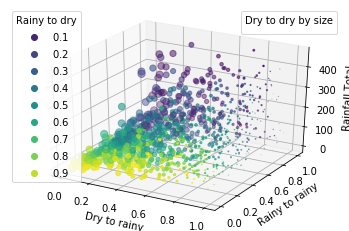

In [6]:
# explore probability matrix results graphically
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(d2rs,r2rs,totalrain,c=r2ds,s=np.square(np.multiply(d2ds,7.5)))
ax.legend
ax.set_zlabel('Rainfall Total')
plt.xlabel('Dry to rainy')
plt.ylabel('Rainy to rainy')
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="upper left", title="Rainy to dry")
legend2 = ax.legend("",loc="upper right", title="Dry to dry by size")
ax.add_artist(legend1)

The visual results are unsurprising, but are useful for confirming intuition. High rainy to rainy probabilities, combined with high dry to rainy probabilities, often produce high rainfall totals. This is not always the case though, as there is an element of randomness added into the calculation. 

The next step is to combine the results of the simulation into a single data frame, and narrow down the produced probability matrices to those that create accurate results.

In [7]:
# create a data frame of results
# this is probably very inefficient code
df1 = {
    'Dry to dry': d2ds
}
df1 = pd.DataFrame(df1)
df2 = {
    'Dry to rain': d2rs
}
df2 = pd.DataFrame(df2)
df3 = {
    'Rain to rain': r2rs
}
df3 = pd.DataFrame(df3)
df4 = {
    'Rain to dry': r2ds
}
df4 = pd.DataFrame(df4)
df5 = {
    'Total Rain (mm)': totalrain
}
df5 = pd.DataFrame(df5)
df6 = {
    'Rainy Days': totalraindays
}
df6 = pd.DataFrame(df6)
df7 = pd.concat([df1,df2,df3,df4,df5,df6],axis = 1)
df7[1:10]

,Dry to dry,Dry to rain,Rain to rain,Rain to dry,Total Rain (mm),Rainy Days
1,0.217798,0.782202,0.584498,0.415502,151.00,20
2,0.361993,0.638007,0.027595,0.972405,46.98,9
3,0.443641,0.556359,0.301545,0.698455,94.80,10
4,0.649981,0.350019,0.967046,0.032954,264.04,28
5,0.523630,0.476370,0.932680,0.067320,326.25,29
6,0.473176,0.526824,0.373730,0.626270,52.35,15
7,0.378908,0.621092,0.822485,0.177515,142.75,25
8,0.554425,0.445575,0.671157,0.328843,303.24,21
9,0.385035,0.614965,0.438368,0.561632,23.00,20


By inspecting the data, the random variation is quite apparent. Simulations that produce similar numbers of rainy days often have very different rainfall totals. 

### Narrow down probability matrix to a range within standard deviation of historial average

In [8]:
# look at distribution of probability values
# limit the probability matrix to values within 1 standard deviation of the mean historical value
# through model optimization, the lower limit has been moved up

rainrange = df7.loc[(df7['Total Rain (mm)'] >= 100) & (df7['Total Rain (mm)'] <= 218)]
rainrange

# inspect the distributions visually

#plt.hist(rainrange['Dry to dry'],alpha = .5)
#plt.hist(rainrange['Dry to rain'],alpha = .5)
#plt.hist(rainrange['Rain to dry'],alpha = .5)
#plt.hist(rainrange['Rain to rain'],alpha = .5)

print("Dry to dry: ",np.mean(rainrange['Dry to dry']))
print("Dry to rainy: ",np.mean(rainrange['Dry to rain']))
print("Rainy to rainy: ",np.mean(rainrange['Rain to rain']))
print("Rainy to dry: ",np.mean(rainrange['Rain to dry']))

Dry to dry:  0.43649566803732565
Dry to rainy:  0.5635043319626745
Rainy to rainy:  0.49242619157409406
Rainy to dry:  0.5075738084259057


I will use the mean values of probabilities that produce rainfall results in the chosen range. <br>
44% chance of a dry day transitioning to a dry day <br>
56% chance of a dry day transitioning to a rainy day <br>
49% chance of a rainy day transitioning to a rainy day <br>
51% chance of a rainy day transitioning to a rainy day <br>

These values may change slightly with each simulation, and will change if parameters are adjusted.

## Rerun the simulation with new probability matrix values

In [9]:
# rerun the simulation with the mean probability values

N=1000

states = ["Dry","Rainy"]
d2ds = []
d2rs = []
r2rs = []
r2ds = []
totalrain = []
totalraindays = []
dailyrain = []
transition = [["Dry2Dry","Dry2Rain"],["Rain2Rain","Rain2Dry"]]

for i in range(N):
    dry2dry = np.mean(rainrange['Dry to dry'])
    dry2rain = 1-dry2dry
    rain2rain = np.mean(rainrange['Rain to rain'])
    rain2dry = 1-rain2rain
    probabilityMatrix = [[dry2dry,dry2rain],[rain2rain,rain2dry]]
    d2ds.append(dry2dry)
    d2rs.append(dry2rain)
    r2rs.append(rain2rain)
    r2ds.append(rain2dry)
    
    def forecast(days):
        weatherToday = rm.choice(states)
        i = 0
        rainydays = 0
        rainaccumulated = 0
        if weatherToday =="Rainy":
            rainydays += 1
            dailyrain.append(round(mean_monthly_precip/mean_rain_days + random.uniform(-7,7),2))
        else:
            pass      
        while i < days:
            if weatherToday == "Dry":
                change = np.random.choice(transition[0],replace=True,p=probabilityMatrix[0])
                if change == "Dry2Dry":
                    pass
                else:
                    weatherToday = "Rainy"
                    rainydays += 1
            elif weatherToday == "Rainy":
                change = np.random.choice(transition[1],replace=True,p=probabilityMatrix[1])
                if change == "Rain2Rain":
                    rainydays += 1
                else:
                    weatherToday = "Dry"
            i += 1
        rainaccumulated = rainydays * round(mean_monthly_precip/mean_rain_days + random.uniform(-7,7),2)
        totalrain.append(rainaccumulated)
        totalraindays.append(rainydays)
   
    forecast(31)


## Inspect results and compare to historical data

Mean simulated rainfall total:  132.31 mm


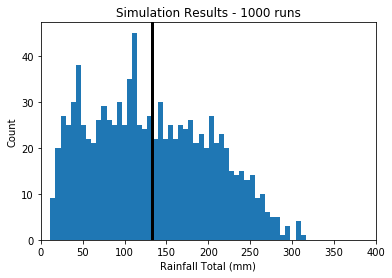

In [10]:
# plot distribution of rainfall totals

myhist = plt.hist(totalrain,bins = 50)
plt.xlabel('Rainfall Total (mm)')
plt.ylabel('Count')
plt.title('Simulation Results - 1000 runs')
plt.xlim(0,400)
plt.axvline(linewidth = 3 ,x = np.mean(totalrain), color = 'black')

print("Mean simulated rainfall total: ",round(np.mean(totalrain),2),"mm")

Mean historical rainfall total:  143.7 mm


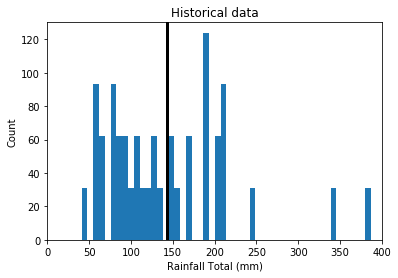

In [11]:
# compare to historical

oldhist = plt.hist(pdxdata['MonthTotal'], bins = 50)
plt.xlabel('Rainfall Total (mm)')
plt.ylabel('Count')
plt.title('Historical data')
plt.xlim(0,400)
plt.axvline(linewidth = 3 ,x = np.mean(pdxdata['MonthTotal']), color = 'black')
print("Mean historical rainfall total: ",round(np.mean(pdxdata['MonthTotal']),2),"mm")

## Simulating a single month

This code is just a tool for viewing a single month

In [13]:
# What does 1 month look like?

states = ["Dry","Rainy"]
transition = [["Dry2Dry","Dry2Rain"],["Rain2Rain","Rain2Dry"]]
# Probabilities matrix (transition matrix)
# random numbers
dry2dry = np.mean(rainrange['Dry to dry'])
dry2rain = 1-dry2dry
rain2rain = np.mean(rainrange['Rain to rain'])
rain2dry = 1-rain2rain
probabilityMatrix = [[dry2dry,dry2rain],[rain2rain,rain2dry]]
print("Probability Matrix: ",transition)

def weatherForecast(days):
    weatherToday = rm.choice(states)
    i = 0
    rainydays = 0
    rainaccumulated = 0
    print("Starting weather: ",weatherToday)
    if weatherToday =="Rainy":
        rainydays += 1
    else:
        pass
    while i < days:
        if weatherToday == "Dry":
            change = np.random.choice(transition[0],replace=True,p=probabilityMatrix[0])
            if change == "Dry2Dry":
                pass
            else:
                weatherToday = "Rainy"
                rainydays += 1
        elif weatherToday == "Rainy":
            change = np.random.choice(transition[1],replace=True,p=probabilityMatrix[1])
            if change == "Rain2Rain":
                rainydays += 1                
            else:
                weatherToday = "Dry"
        print(weatherToday)
        i += 1
        time.sleep(0.05)
    print("Rainy days: ",rainydays)
    avgdailyrain = round(mean_monthly_precip/mean_rain_days + random.uniform(-7,7),2)
    print("Average Daily Rain: ", avgdailyrain,"mm, ",round(avgdailyrain/25.4,2),"in")
    rainaccumulated = rainydays * avgdailyrain
    print("Month rain total: ",rainaccumulated,"mm, ",round(rainaccumulated/25.4,2),"in")
    
weatherForecast(31)

Probability Matrix:  [['Dry2Dry', 'Dry2Rain'], ['Rain2Rain', 'Rain2Dry']]
Starting weather:  Rainy
Rainy
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Dry
Rainy
Dry
Rainy
Rainy
Dry
Rainy
Rainy
Rainy
Dry
Rainy
Rainy days:  16
Average Daily Rain:  12.46 mm,  0.49 in
Month rain total:  199.36 mm,  7.85 in


## Conclusion, Discussion, and Challenges

This simulation reproduced average December rainfall with reasonable skill, given that it is a fairly unsophisticated method of weather forecasting. This speaks to the power of markov chains and the monte carlo distribution as simulation methods. However, the results are not without shortcomings. Rainfall appears to be systematically underestimated, which may be an issue with the parameterization, or the methodology. Given more time, these issues would be further explored. Additionally, the simulation has a tendency to produce extremely anomalously dry Decembers with equal probability of just slight dry Decembers, which is physically unrealistic. This makes sense in context of the methodology, as no climate information beyond average daily rainfall is provided. Ideally there should be a test for statistical significance when comparing the simulated rainfall distribution and the historical rainfall distribution, but that is beyond the scope of what I set out to do here.

Some challenges that came along with this project included the coding itself, which I am relatively unfamiliar with, and deciding on how to use my historical parameters. At the moment, the simulation calculates rainfall days in a month, and then multiplies that number by a slightly randomized parameter based on historical data. It might be more accurate to produce a number for every single day in the simulation. This is a process I tried, but it proved to be difficult, so I settled on the month total method. Another challenge that I was unable to resolve is deciding on an optimal number of simulations to run my probability matrix validation code. There should be a quantitative way to determine that, but I used trial and error and used a number that ended up producing reasonable results.

Overall I consider this project as a successful demonstration of how relatively simple simulation methods can be used to capture complex processes.